In [1]:
import pandas as pd
import numpy as np

# import only the selected fields from raw datasets
_fields = ['Resident_Status','Education','Month_Of_Death','Sex','Age_Recode_12','Place_Of_Death','Marital_Status','DOW_of_Death','Injured_At_Work','Manner_Of_Death','Race','Hispanic_Origin_Recode']
train_df = pd.read_csv('data/CDC-MortalityData.csv', usecols=_fields)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,9,11,13,16,68,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df = train_df.copy()

In [3]:
# clean data
df = df[df['Resident_Status'] != 'Resident_Status']

df['Resident_Status'] = df['Resident_Status'].astype(int)

df['Education'] = pd.to_numeric(df['Education'].fillna(value=99).astype(str).str.strip()).fillna(value=99).astype(int)

df['Month_Of_Death'] = df['Month_Of_Death'].astype(str).str.strip().astype(int)
df['Month_Of_Death'] = df['Month_Of_Death'].where(df['Month_Of_Death'] < 101, df['Month_Of_Death'] - 100)

df['Sex'] = df['Sex'].str.strip()

df['Age_Recode_12'] = df['Age_Recode_12'].astype(str).str.strip().astype(int)

df['Place_Of_Death'] = df['Place_Of_Death'].astype(str).str.strip().astype(int)

df['Marital_Status'] = df['Marital_Status'].str.strip()

df['DOW_of_Death'] = df['DOW_of_Death'].astype(str).str.strip().astype(int)

df['Injured_At_Work'] = df['Injured_At_Work'].str.strip()

df['Manner_Of_Death'] = pd.to_numeric(df['Manner_Of_Death'].fillna(value=9).astype(str).str.strip()).fillna(value=9).astype(int)

df['Race'] = df['Race'].astype(str).str.strip().astype(int)

df['Hispanic_Origin_Recode'] = df['Hispanic_Origin_Recode'].astype(str).str.strip().astype(int)

In [4]:
# export dataset into new csv file

# df.to_csv('data/preprocessed.csv')
# df.sample(100000).to_csv('data/preprocessed_100k.csv')
# train_df.sample(100000).to_csv('data/raw_100k.csv')

In [5]:
df

,Resident_Status,Education,Month_Of_Death,Sex,Age_Recode_12,Place_Of_Death,Marital_Status,DOW_of_Death,Injured_At_Work,Manner_Of_Death,Race,Hispanic_Origin_Recode
0,1,99,5,M,11,7,W,1,U,9,1,6
1,1,99,5,M,9,1,M,5,U,9,1,6
2,2,99,5,F,11,7,W,1,U,9,1,6
3,1,99,5,M,11,6,M,6,U,9,1,6
4,2,99,6,M,10,4,M,7,U,9,1,6
5,1,99,5,M,8,2,M,6,U,9,1,6
6,1,99,6,M,9,4,W,6,U,9,1,6
7,2,99,5,M,5,7,M,3,N,1,1,6
8,1,99,5,M,11,4,M,2,U,9,1,6
9,1,99,5,F,10,1,W,4,U,9,1,1


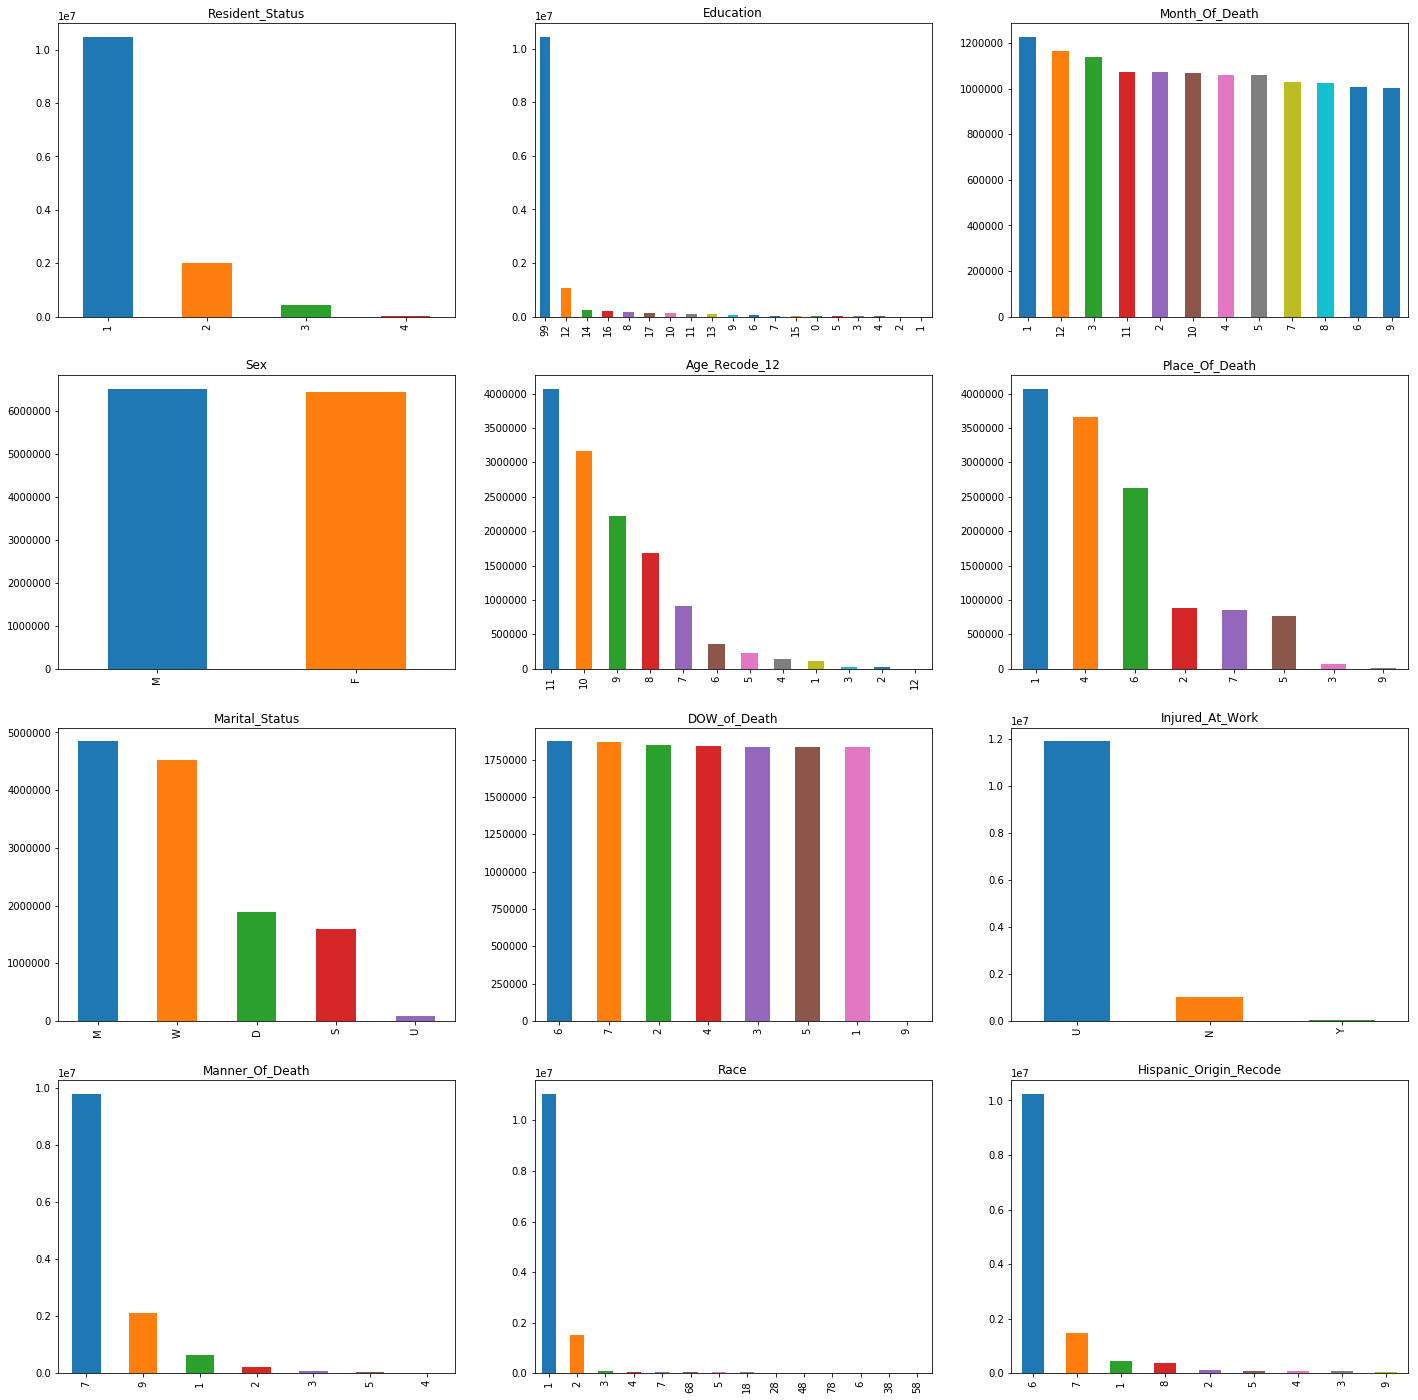

In [7]:
import matplotlib.pyplot as plt

# histogram of value counts for each attribute
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)
rows = 4
cols = 3

for i in range(cols):
    for j in range(rows):
        plt.subplot(rows, cols, i+j*cols+1)
        df[_fields[i+j*cols]].value_counts().plot(title=_fields[i+j*cols],kind='bar')  
    
plt.show()